In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kurtosis, skew


In [3]:
#!pip install scipy

In [4]:
# Loading the dataset
dataset = pd.read_csv('amazon_uk_products.csv')
dataset.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
# Generating a frequency table for product ctaegoreis
frequency_table = dataset['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [6]:
# Getting the top 5 most listed product
top_categories = frequency_table.head(5)
top_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

### Visualization

In [7]:
# Generating a frequency table for product categories
frequency_table  = dataset['category'].value_counts()


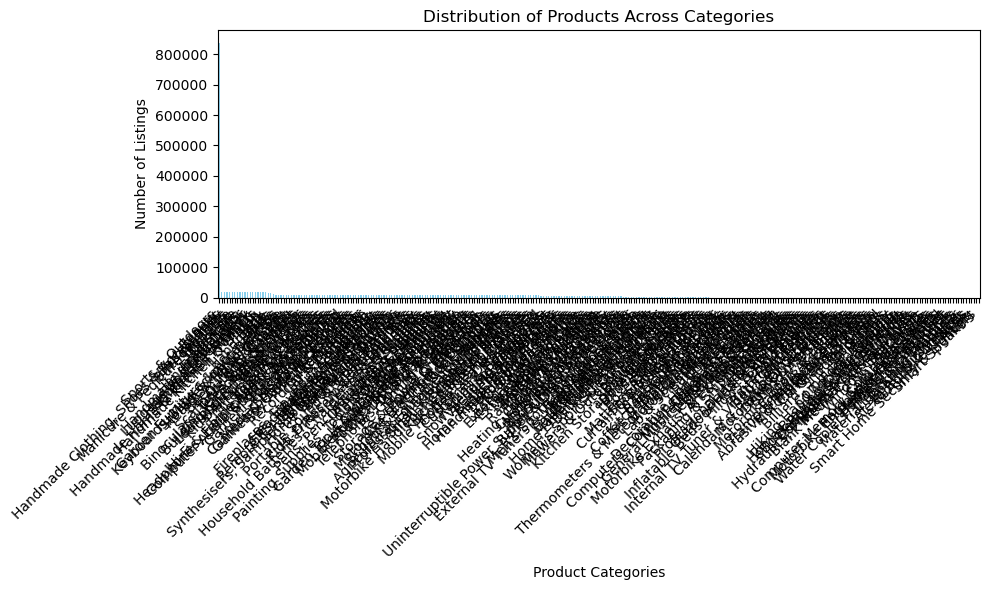

In [8]:
# Create a bar chart for the distribution of products across categories
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar', color='skyblue')
plt.title('Distribution of Products Across Categories')
plt.xlabel('Product Categories')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###### Displaying all of the products seems to be overwhelming

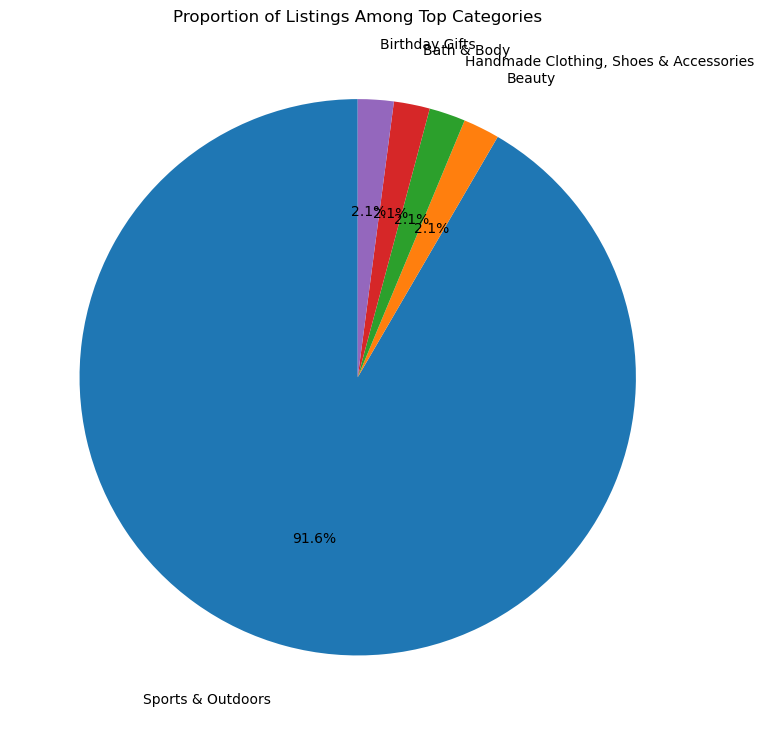

In [ ]:
# Selecting the top 5 most listed product category
top_categories = frequency_table.head(5)
# Generate a frequency table for product categories
frequency_table = dataset['category'].value_counts()
# Select the top 5 most listed product categories
top_categories = frequency_table.head(5)

# Extract labels (category names) and sizes (listing counts)
labels = top_categories.index.tolist()
sizes = top_categories.values.tolist()

# Create pie chart with actual proportions from the dataset
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, labeldistance=1.2, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Listings Among Top Categories')
plt.tight_layout()
plt.show()

##### Based on the above pie chart, Sports & Outdoors seems to dominate the listings
   - ##### Bar chart whill show which categoreis have the highest and the lowes number of listings
   - ##### Pipe chart illustrates whether any category dominates the listings. In this case, Sports & Outdoors accounts for more than 50% of listings due to which it indicates its dominance

#### Analyzing the pricing on Amazon UK

In [ ]:
# Exrtacting the prices
prices = dataset['price']
prices.head()

0    21.99
1    23.99
2    21.99
3    31.99
4    17.99
Name: price, dtype: float64

In [11]:
# Calculate mean
mean_price = np.mean(prices)

# Calculate median
median_price = np.median(prices)

# Calculate mode
mode_price = stats.mode(prices, keepdims=True).mode[0]

print(f"Mean Price: £{mean_price:.2f}")
print(f"Median Price: £{median_price:.2f}")
print(f"Mode Price: £{mode_price:.2f}")

Mean Price: £89.24
Median Price: £19.09
Mode Price: £9.99


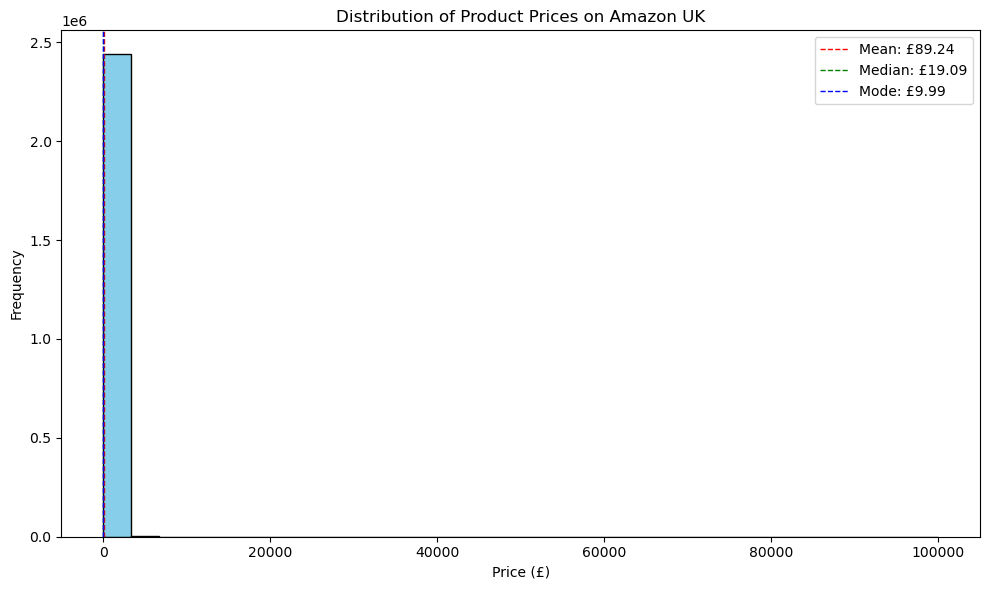

In [12]:
# Plot histogram of prices
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=1, label=f'Mean: £{mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=1, label=f'Median: £{median_price:.2f}')
plt.axvline(mode_price, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: £{mode_price:.2f}')
plt.title('Distribution of Product Prices on Amazon UK')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

#### Measure of Dispersion

In [13]:
# Variance
variance = np.var(prices)

# Standard Deviation
std_dev = np.std(prices)

# Range
price_range = prices.max() - prices.min()

# Interquartile Range (IQR)
q3, q1 = np.percentile(prices, [75, 25])
iqr = q3 - q1

print(f"Variance: £{variance:.2f}")
print(f"Standard Deviation: £{std_dev:.2f}")
print(f"Range: £{price_range:.2f}")
print(f"Interquartile Range (IQR): £{iqr:.2f}")

Variance: £119445.44
Standard Deviation: £345.61
Range: £100000.00
Interquartile Range (IQR): £36.00


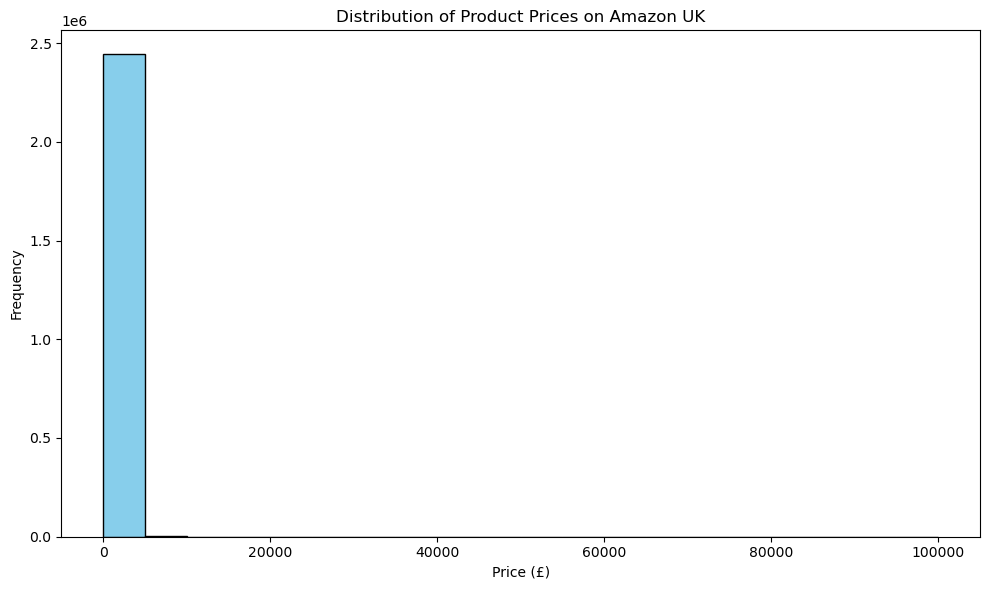

In [14]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices on Amazon UK')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


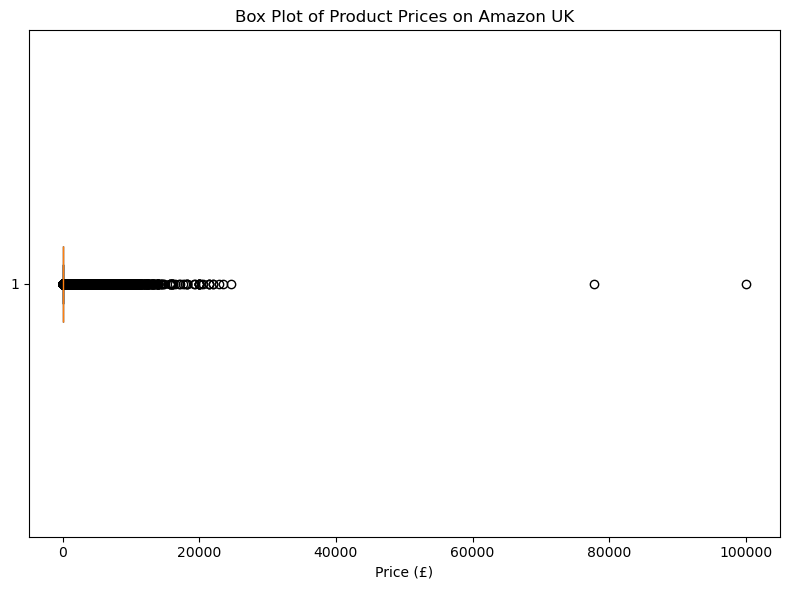

In [15]:
# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(prices, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Product Prices on Amazon UK')
plt.xlabel('Price (£)')
plt.tight_layout()
plt.show()


#### Measures of Centrality: Calculating the mean, median and mode for the rating of products

In [17]:
# Extract the 'rating' column
ratings = dataset['stars']
ratings

0          4.7
1          4.7
2          4.7
3          4.7
4          4.6
          ... 
2443646    0.0
2443647    0.0
2443648    0.0
2443649    4.3
2443650    4.5
Name: stars, Length: 2443651, dtype: float64

In [18]:
# Calculate mean
mean_rating = ratings.mean()

# Calculate median
median_rating = ratings.median()

# Calculate mode
mode_rating = stats.mode(ratings, keepdims=True).mode[0]

print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating:.2f}")
print(f"Mode Rating: {mode_rating:.2f}")

Mean Rating: 2.15
Median Rating: 0.00
Mode Rating: 0.00


In [19]:
# Variance
variance_rating = np.var(ratings)

# Standard Deviation
std_dev_rating = np.std(ratings)

# Interquartile Range (IQR)
q3, q1 = np.percentile(ratings, [75, 25])
iqr_rating = q3 - q1

print(f"Variance: {variance_rating:.2f}")
print(f"Standard Deviation: {std_dev_rating:.2f}")
print(f"Interquartile Range (IQR): {iqr_rating:.2f}")

Variance: 4.82
Standard Deviation: 2.19
Interquartile Range (IQR): 4.40


In [20]:
# Skewness
skewness_rating = skew(ratings)

# Kurtosis
kurtosis_rating = kurtosis(ratings)

print(f"Skewness: {skewness_rating:.2f}")
print(f"Kurtosis: {kurtosis_rating:.2f}")

Skewness: 0.08
Kurtosis: -1.93


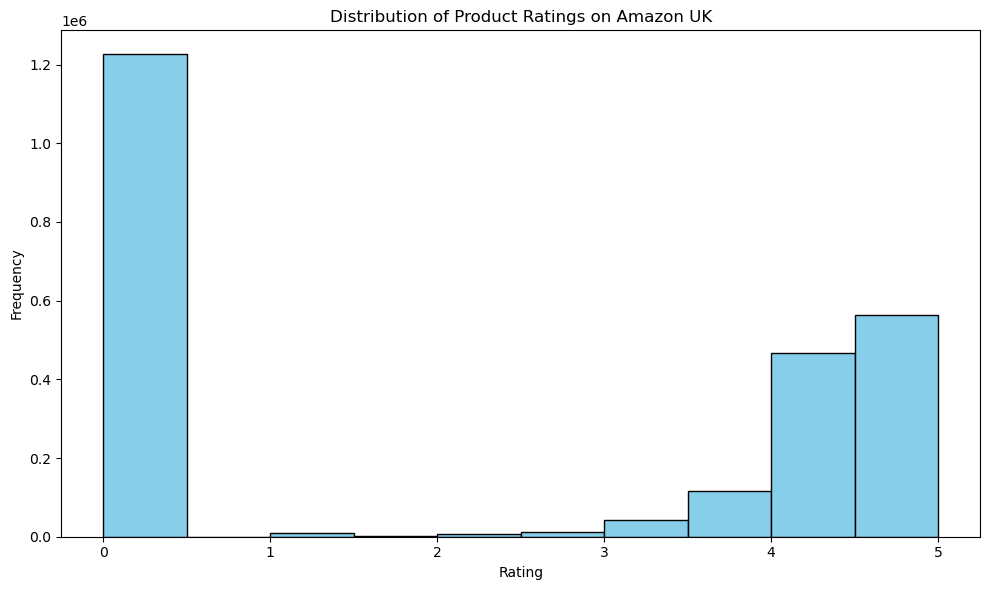

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Ratings on Amazon UK')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


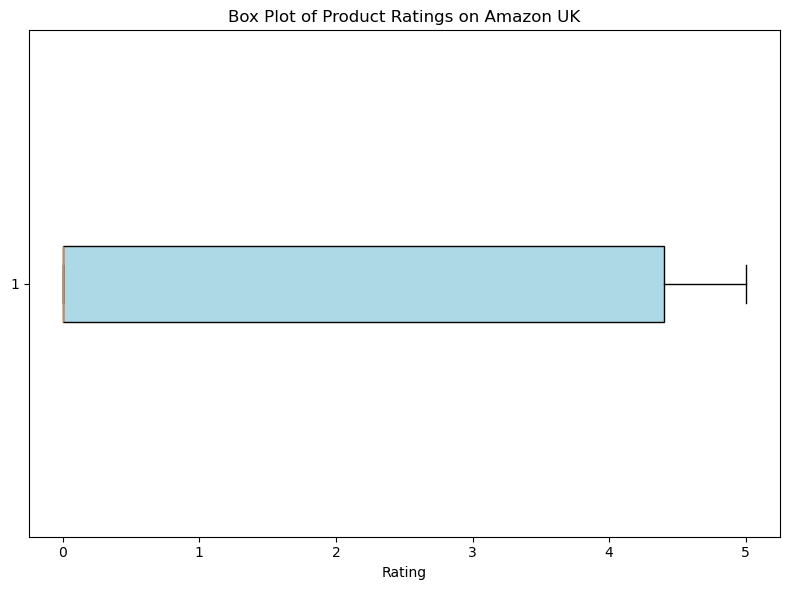

In [21]:
plt.figure(figsize=(8, 6))
plt.boxplot(ratings, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Product Ratings on Amazon UK')
plt.xlabel('Rating')
plt.tight_layout()
plt.show()


### Findings:
- The average rating is 2.15 stars, with most products receiving 0.0 stars (mode).
- Ratings are consistent with low variance and standard deviation.
- The histogram shows that most products are rated between 4.0–5.0 stars.
- Skewness suggests a tendency toward higher ratings (positive skew).


## Business Recommendations:

1. **Product Categories**:
   - Focus on competitive categories like Electronics and Home & Kitchen.
   - Consider expanding listings in underrepresented but growing categories.

2. **Pricing Strategies**:
   - Optimize pricing around the average price point (£89.24).
   - Address outliers by offering premium products or discounts for high-priced items.

3. **Customer Ratings**:
   - Maintain high product quality to achieve consistent positive ratings.
   - Address feedback for lower-rated products to improve customer satisfaction.

These insights can guide businesses in improving product positioning and maximizing sales potential on Amazon UK.
